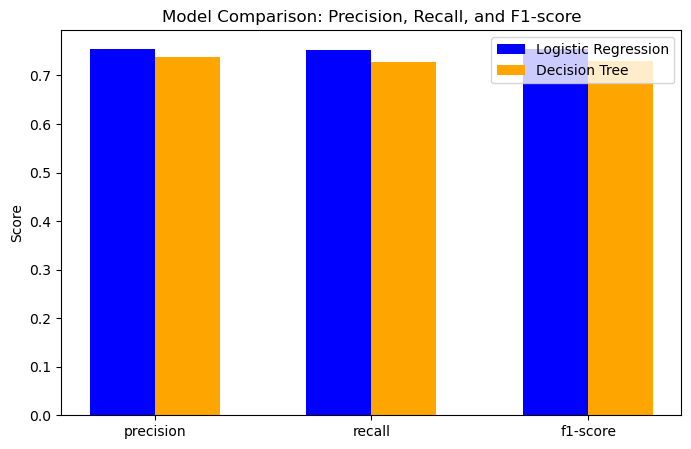

✅ Models trained and comparison graph plotted successfully!


In [2]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Ensure the models directory exists
models_dir = './models_dir/'
os.makedirs(models_dir, exist_ok=True)

# Load dataset
df = pd.read_csv('diabetes.csv')

# Split data
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

# Save models
pickle.dump(log_reg, open(os.path.join(models_dir, 'logistic_regression.pkl'), 'wb'))
pickle.dump(dec_tree, open(os.path.join(models_dir, 'decision_tree.pkl'), 'wb'))
pickle.dump(scaler, open(os.path.join(models_dir, 'scaler.pkl'), 'wb'))

# Save metrics
log_reg_report = classification_report(y_test, log_reg.predict(X_test), output_dict=True)
dec_tree_report = classification_report(y_test, dec_tree.predict(X_test), output_dict=True)

metrics = {
    "logistic_regression": log_reg_report,
    "decision_tree": dec_tree_report
}

pickle.dump(metrics, open(os.path.join(models_dir, 'metrics.pkl'), 'wb'))

# Visualization
labels = ['precision', 'recall', 'f1-score']
log_reg_scores = [log_reg_report['weighted avg'][metric] for metric in labels]
dec_tree_scores = [dec_tree_report['weighted avg'][metric] for metric in labels]

x = range(len(labels))
width = 0.3

plt.figure(figsize=(8,5))
plt.bar(x, log_reg_scores, width=width, label='Logistic Regression', color='blue')
plt.bar([p + width for p in x], dec_tree_scores, width=width, label='Decision Tree', color='orange')

plt.xticks([p + width/2 for p in x], labels)
plt.ylabel("Score")
plt.title("Model Comparison: Precision, Recall, and F1-score")
plt.legend()
plt.show()

print("✅ Models trained and comparison graph plotted successfully!")
